In [2]:
# imports
import numpy as np
import os
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cwd = os.getcwd()

/tmp/ipykernel_4594/3636510662.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# getting acquisitions
acquisition_maxsize=420_000
sample_size=8400
n_accelerometers=1
labels=[]
keys=[]
signal_data=np.empty((0, sample_size, n_accelerometers))


# HUST bearing

In [4]:
list_of_bearings_all = [
    "B500", "B502", "B504", "B600", "B602", "B604", "B700", "B702", "B704", "B800",
    "B802", "B804", "I400", "I402", "I404", "I500", "I502", "I504", "I600", "I602",
    "I604", "I700", "I702", "I704", "I800", "I802", "I804", "IB500", "IB502", "IB504", 
    "IB600", "IB602", "IB604", "IB700", "IB702", "IB704", "IB800", "IB802", "IB804", 
    "IO400", "IO402", "IO404", "IO500", "IO502", "IO504", "IO600", "IO602", "IO604", 
    "IO700", "IO702", "IO704", "IO800", "IO802", "IO804", "N400", "N402", "N404", 
    "N500", "N502", "N504", "N600", "N602", "N604", "N700", "N702", "N704", "N800", 
    "N802", "N804", "O400", "O402", "O404", "O500", "O502", "O504", "O600", "O602", 
    "O604", "O700", "O702", "O704", "O800", "O802", "O804", "OB400", "OB402", "OB404", 
    "OB500", "OB502", "OB504", "OB600", "OB602", "OB604", "OB700", "OB702", "OB704", 
    "OB800", "OB802", "OB804"
]

list_of_bearings_dbg = [
    "B500", "B502", "B504", "I400", "I402", "I404", "IB500", "IB502", "IB504",  
    "IO400", "IO402", "IO404", "N400", "N402", "N404", "O400", "O402", "O404", 
    "OB400", "OB402", "OB404",
]

## Caminho para os arquivos

In [ ]:
# geting files path

def get_hust_bearings():
    list_of_bearings = eval("list_of_bearings_all")
    bearing_file_names = [name+'.mat' for name in list_of_bearings]
    bearing_label = [label for label in bearing_file_names]    
    return np.array(bearing_label), np.array(bearing_file_names)

files_path = {}
bearing_labels, bearing_names = get_hust_bearings()
for key, bearing in zip(bearing_labels, bearing_names):
    files_path[key] = os.path.join("raw_hust", bearing)


## Transformada de Fourier

In [6]:
def fft(data, sample_rate, sample_size):
    T = 1/sample_rate
    f = np.fft.fftfreq(sample_size, T)
    transf = np.fft.fft(data)
    return f, transf

In [7]:
def plot_fft(label, key, sample_size=8000, fs=42000):
    T=1/fs
    matlab_file = scipy.io.loadmat(os.path.join(cwd, files_path[label+'.mat']))
    data = matlab_file[key].reshape(1, -1)[0][:sample_size]
    f, transf = fft(data, sample_rate=fs, sample_size=sample_size)

    plt.figure(figsize=(16,5))
    plt.title(label)
    plt.plot(f[f>0], transf[f>0] * 1/sample_size)

## Informações sobre o dataset

Amostras que apresentam dados ru e ru_raw

In [8]:
# "B500", "B502", "B504", "B600", "B602", "B604", "B700", "B702", "B704", "B800",
max_size = 420000
list_labels_ru = []
list_labels_raw = []
list_labels = []
for label in list_of_bearings_all:
    matlab_file = scipy.io.loadmat(os.path.join(cwd, files_path[label+'.mat']))
    try:
        matlab_file['ru_raw']
        list_labels_raw.append(label)
    except KeyError:
        try:
            matlab_file['ru']
            list_labels_ru.append(label)
        except KeyError:
            list_labels.append(label)

print("Quantidade de arquivos COM dados ru:", len(list_labels_ru))
print("Etiquetas dos arquivos COM dados ru:", list_labels_ru)
print("Quantidade de arquivos COM dados ru_raw:", len(list_labels_raw))
print("Etiquetas dos arquivos COM dados ru_raw:", list_labels_raw)
print("Quantidade de arquivos SEM dados ru e ru_raw:", len(list_labels))
print("Etiquetas dos arquivos SEM ru e ru_raw:", list_labels)


Quantidade de arquivos COM dados ru: 46
Etiquetas dos arquivos COM dados ru: ['B500', 'B600', 'B602', 'B604', 'B700', 'B800', 'B802', 'B804', 'I400', 'I600', 'I602', 'I604', 'I700', 'I704', 'IB600', 'IB602', 'IB604', 'IB700', 'IB702', 'IB704', 'IO400', 'IO402', 'IO404', 'IO600', 'IO602', 'IO604', 'IO700', 'N600', 'N602', 'N604', 'N700', 'O600', 'O602', 'O604', 'O700', 'O702', 'O704', 'OB402', 'OB404', 'OB500', 'OB502', 'OB504', 'OB600', 'OB602', 'OB604', 'OB700']
Quantidade de arquivos COM dados ru_raw: 52
Etiquetas dos arquivos COM dados ru_raw: ['B502', 'B504', 'B702', 'B704', 'I402', 'I404', 'I500', 'I502', 'I504', 'I702', 'I800', 'I802', 'I804', 'IB500', 'IB502', 'IB504', 'IB800', 'IB802', 'IB804', 'IO500', 'IO502', 'IO504', 'IO702', 'IO704', 'IO800', 'IO802', 'IO804', 'N400', 'N402', 'N404', 'N500', 'N502', 'N504', 'N702', 'N704', 'N800', 'N802', 'N804', 'O400', 'O402', 'O404', 'O500', 'O502', 'O504', 'O800', 'O802', 'O804', 'OB702', 'OB704', 'OB800', 'OB802', 'OB804']
Quantidade 

## Construindo gráficos

(512000, 1)


/home/adriano/bearing-fault-diagnosis/env/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/adriano/bearing-fault-diagnosis/env/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


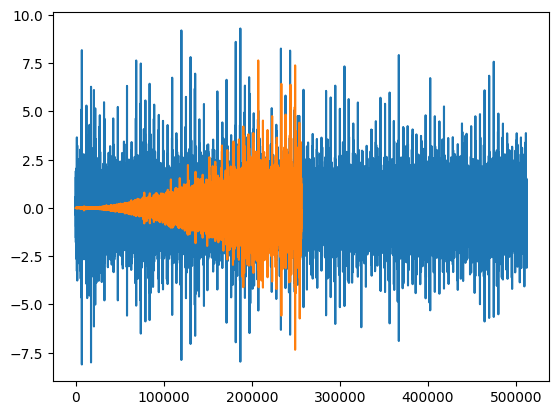

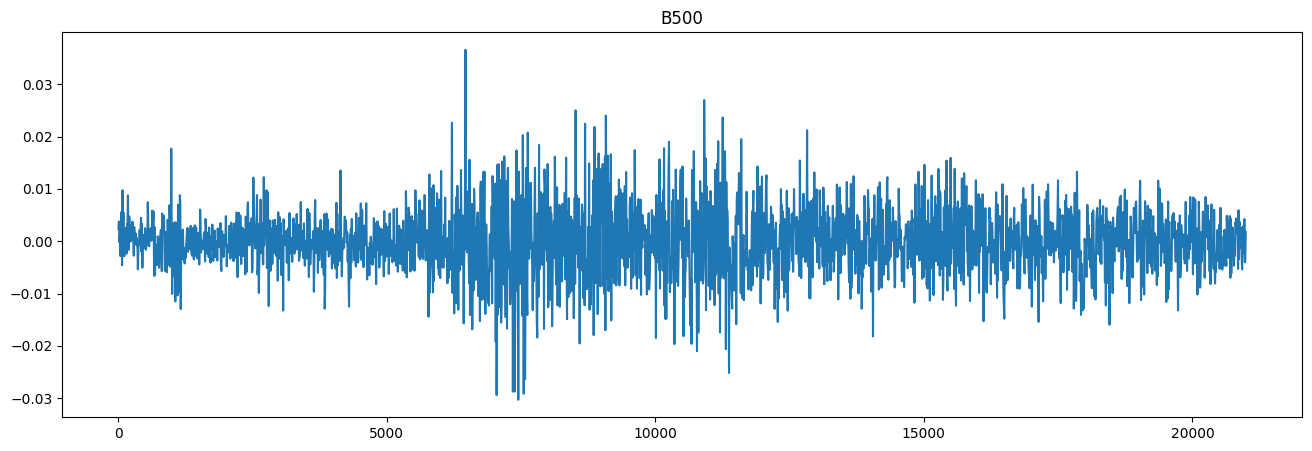

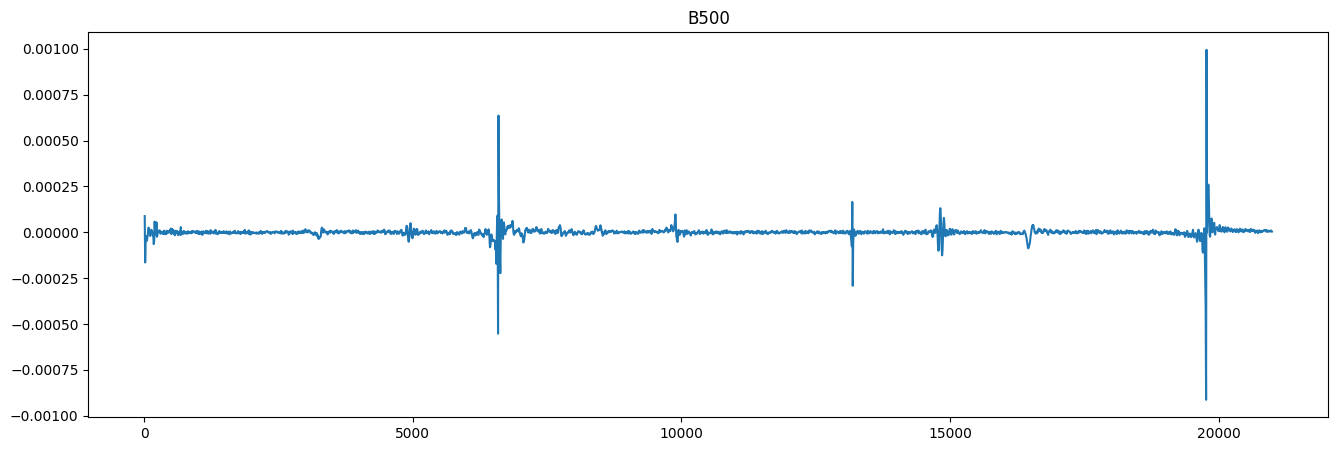

In [ ]:
matlab_file = scipy.io.loadmat(os.path.join(cwd, files_path['B500.mat']))
data = matlab_file['data']
ru = matlab_file['ru']
print(data.shape)
plt.plot(data)
plt.plot(ru)
plot_fft(label='B500', key='data', sample_size=5000)
plot_fft(label='B500', key='ru', sample_size=5000)


## Violin plot

/home/adriano/bearing-fault-diagnosis/env/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/adriano/bearing-fault-diagnosis/env/lib/python3.10/site-packages/pandas/core/dtypes/astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


<Axes: xlabel='label', ylabel='value'>

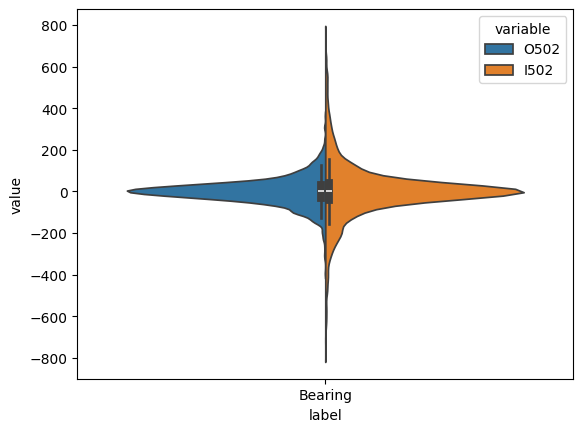

In [12]:
# 'B500', 'B600', 'B602', 'B604', 'B700', 'B800', 'B802', 'B804', 'I400',
sample_size=5000
sample_rate=42000
key='Bearing'
bearings=['O502', 'I502']

matlab_file_0 = scipy.io.loadmat(os.path.join(cwd, files_path[bearings[0]+'.mat']))
data_0 = matlab_file_0['data'].reshape(1,-1)[0][0:sample_size]
matlab_file_1 = scipy.io.loadmat(os.path.join(cwd, files_path[bearings[1]+'.mat']))
data_1 = matlab_file_1['data'].reshape(1,-1)[0][0:sample_size]

_, transf_data_0 = fft(data_0, sample_rate=sample_rate, sample_size=sample_size)
_, transf_data_1 = fft(data_1, sample_rate=sample_rate, sample_size=sample_size)

label = [key for _ in range(0,sample_size)]
data_dic = {"label": label,
            f"{bearings[0]}": transf_data_0[0:sample_size].reshape(1,-1)[0], 
            f"{bearings[1]}": transf_data_1[0:sample_size].reshape(1,-1)[0]}
df = pd.DataFrame(data_dic)
df_melted = pd.melt(df, id_vars=['label'], value_vars=[f'{bearings[0]}', f'{bearings[1]}'])
sns.violinplot(data=df_melted, x="label", y="value", hue="variable", split=True)

## Debugando código

In [15]:
# getting acquisitions
acquisition_maxsize=420_000
sample_size=8400
signal_data = np.empty((0, sample_size, 1))
labels = []

cwd = os.getcwd()
for x, key in enumerate(files_path):
    matlab_file = scipy.io.loadmat(os.path.join(cwd, files_path[key]))    
    acquisition = []
    acquisition.append(matlab_file['data'].reshape(1, -1)[0][:acquisition_maxsize])
    acquisition = np.array(acquisition)
    if len(acquisition.shape)<2 or acquisition.shape[0]<1:
        continue
    for i in range(acquisition.shape[1]//sample_size):
        sample = acquisition[:,(i * sample_size):((i + 1) * sample_size)]
        signal_data = np.append(signal_data, np.array([sample.T]), axis=0)
        labels = np.append(labels, key[0])
        keys = np.append(keys, key)
        

print(signal_data.shape)

(4820, 8400, 1)


## Espectograma

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from IPython.display import display, clear_output
import time

nperseg = 505 # segments for the image
noverlap = 460 # over lap per image used
segment_size = 512 # setting size of image

def spectogram_plot(data, fs):
    for i in range(0, segment_size*100, segment_size):
        print(f'segment = data[{i}:{segment_size}]')
        segment = data[i:i+segment_size]
        f, t, Sxx = signal.stft(segment, nperseg=1024)
        
        plt.clf()

        fig = plt.figure(figsize=(8, 6))
        plt.imshow(np.fliplr(abs(Sxx).T).T, cmap='viridis', aspect='auto', extent=[t.min(), t.max(), f.min(), f.max()])
        # can comment out plt.axis('off') to see the x and y axis
        plt.ylabel('Frequency [kHz]')
        plt.xlabel('Number of Samples')
        plt.axis('off')

        display(plt.gcf())        
        clear_output(wait=True)        
        time.sleep(0.5)

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

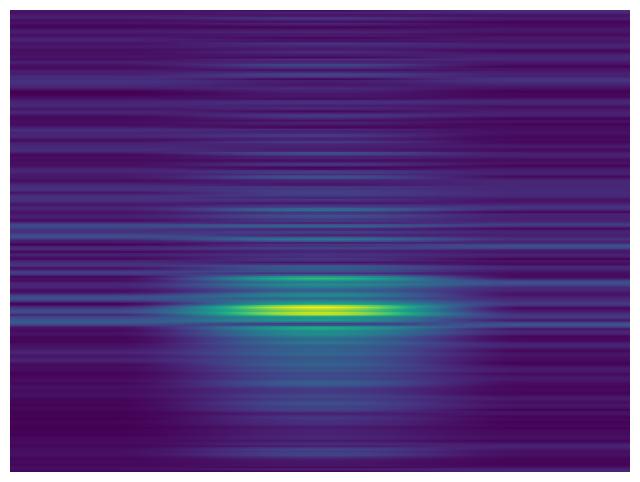

In [45]:

for key in ['B500']:
    matlab_file = scipy.io.loadmat(os.path.join(cwd, files_path[key+'.mat']))
    print(matlab_file['data'].shape)
    data = matlab_file['data'].reshape(1,-1)[0][0:acquisition_maxsize]
    spectogram_plot(data, fs=51_200)

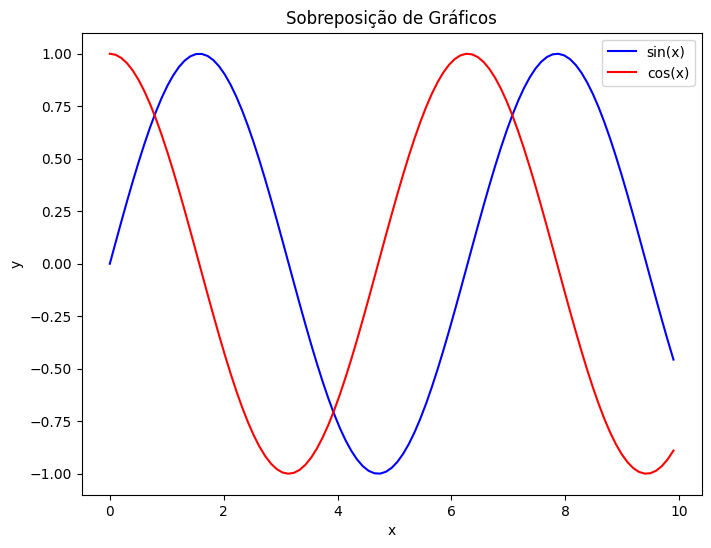

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, clear_output
import time

# Dados para os gráficos
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Configurações do gráfico
plt.figure(figsize=(8, 6))

# Loop para criar a animação
for i in range(len(x)):
    plt.clf()  # Limpa o gráfico atual
    
    # Plota o primeiro conjunto de dados
    plt.plot(x[:i], y1[:i], label='sin(x)', color='blue')
    
    # Plota o segundo conjunto de dados
    plt.plot(x[:i], y2[:i], label='cos(x)', color='red')
    
    plt.title('Sobreposição de Gráficos')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    
    # Exibe o gráfico atual
    display(plt.gcf())
    
    # Limpa a saída para uma animação suave
    clear_output(wait=True)
    
    # Pausa por um curto período de tempo
    time.sleep(0.1)
